In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./crude_futures.csv')

<AxesSubplot:xlabel='date'>

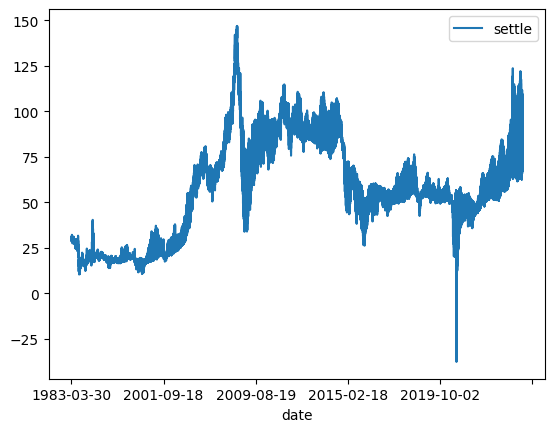

In [6]:
df.plot(x='date', y='settle')

In [12]:
df_m = pd.read_csv('./crude_futures_monthly.csv')
df_m = df_m.dropna()

In [13]:
df_m

,date,code,days,settle
0,1983-06-30,CME_CLF1984,169.0,30.950001
1,1983-07-31,CME_CLF1984,140.0,31.700001
2,1983-08-31,CME_CLF1984,107.0,31.459999
3,1983-09-30,CME_CLF1984,77.0,30.299999
4,1983-10-31,CME_CLF1984,46.0,30.250000
...,...,...,...,...
23857,2022-05-31,CME_CLZ2032,29.0,65.379997
23858,2021-12-31,CME_CLZ2032,180.0,57.950001
23859,2021-11-30,CME_CLZ2032,211.0,56.759998
23860,2022-01-31,CME_CLZ2032,149.0,63.939999


The codes in futures data represent the specific contract being traded. Futures contracts are standardized agreements to buy or sell a specific underlying asset at a certain price and at a certain time in the future. The codes are used to identify each contract, and they typically include information such as the exchange where the contract is traded, the commodity or financial instrument being traded, the delivery month, and the year of delivery. In the example you provided, "CME_CLF1984" is the code for a crude oil futures contract traded on the Chicago Mercantile Exchange (CME), with the delivery month of F : January 1984.

-   F: January
-   G: February
-   H: March
-   J: April
-   K: May
-   M: June
-   N: July
-   Q: August
-   U: September
-   V: October
-   X: November
-   Z: December

In [9]:
df = df_m[(df_m['date'] > '1983-06-30') & (df_m['date'] < '1983-12-30')]

In [11]:
df

,date,code,days,settle
1,1983-07-31,CME_CLF1984,140.0,31.700001
2,1983-08-31,CME_CLF1984,107.0,31.459999
3,1983-09-30,CME_CLF1984,77.0,30.299999
4,1983-10-31,CME_CLF1984,46.0,30.250000
5,1983-11-30,CME_CLF1984,16.0,29.230000
1807,1983-11-30,CME_CLG1984,49.0,28.910000
1808,1983-10-31,CME_CLG1984,79.0,30.139999
1809,1983-08-31,CME_CLG1984,140.0,31.299999
1810,1983-07-31,CME_CLG1984,173.0,31.650000
1812,1983-09-30,CME_CLG1984,110.0,30.250000


In [10]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by the month and year, and calculate the monthly gains/losses
monthly_gains = df.groupby([df['date'].dt.year, df['date'].dt.month])['settle'].last().pct_change()

# Print the monthly gains/losses
print(monthly_gains)

date  date
1983  7            NaN
      8      -0.009114
      9      -0.038059
      10      0.001319
      11     -0.013829
Name: settle, dtype: float64


c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
